In [76]:
import numpy as np
import pandas as pd
import random
from scipy.spatial import distance
from scipy.linalg import svd
import matplotlib.pyplot as plt

In [177]:
# Want to add more centroid_choices and interation end condition
def hard_k_means_cluster(k, data, N):
    """Function to impliment k-means clustering with k clusters on a 2d numpy array of data, formatted such that 
    each row is a single c-dimensional data point, where c is the number of columns"""
    num_rows = data.shape[0]
    num_cols = data.shape[1]
    
    best_total_sqr_dist = -1
    best_cluster_centroids = np.ones((k, num_cols))
    best_clustered_data = [[] for i in range(k)]
    best_cluster_labels = -1
    
    min_max_list = []
    # Get the min and max of data dimension
    for c in range(num_cols):
        min_max_list.append((data[:,c].min(), data[:,c].max()))

    
    for clustering_trial in range(N):
        # Initiate random centroids
        min_max_list = []
        centroids = np.ones((k, num_cols))
        cluster_labels = -1

        # Create k random centroids with dimension values within the range of each data dimension
        for r in range(k):
            for c in range(num_cols):
                centroids[r,c] = random.uniform(min_max_list[c][0],min_max_list[c][1])   
                    
        total_sqr_dist_list = []
        for iteration in range(100):
            ### Update the clusters###
        
            # Initiate an array where each index holds the new cluster identity of the data at the correspoinding row
            # index
            new_clusters = np.ones(num_rows, dtype=int)
            
            # Iterate over each row of the data
            for r in range(num_rows):
                # Get the identity closest centroid to data vector r
                centroid_dists = [distance.euclidean(i,data[r,:]) for i in centroids]
                closest_centroid = np.argmin(centroid_dists)
                
                # Add the centroid indentity to the array new_clusters
                new_clusters[r] = closest_centroid

            ### Update the centroid values###

            clustered_data = [[] for i in range(k)]
            for idx in range(num_rows):
                clustered_data[new_clusters[idx]].append(data[idx,:])        

            for idx, cluster in enumerate(clustered_data):
                if len(cluster) == 0: continue
                else: centroids[idx,:] = np.mean(cluster, axis=0) 
                    
            cluster_labels = new_clusters
        
        cluster_trial_total_sqr_dist = sum([np.sqrt(distance.euclidean(centroids[i], clustered_data[i][r])) for i in range(k) 
                                            for r in range(len(clustered_data[i]))])**2
        total_sqr_dist
        # Check to see if this run had a lower total squared distance and update the best values if it did            
        if (cluster_trial_total_sqr_dist < best_total_sqr_dist) or (best_total_sqr_dist == -1):
            best_total_sqr_dist = cluster_trial_total_sqr_dist
            best_cluster_centroids = centroids
            best_clustered_data = clustered_data
            best_cluster_labels = cluster_labels
        
    return best_clustered_data, best_cluster_centroids, cluster_labels, best_total_sqr_dist


In [189]:
# This is giving me a very low total squared distance...
data = pd.read_csv("w10-data.tbl", delim_whitespace=True)
log_data_arr = np.log10(data.values)
clustered_data, centroids, cluster_labels, sqr_dist = hard_k_means_cluster(8, log_data_arr, 5)

In [230]:
def PCA(data_arr, n):
    """Takes in a non-standardized data array and performs PCA using SVD method. Data should be in tidy format,
    with rows as observations and columns as variables"""
    
    # Center the data
    X_star = data_arr-np.mean(data_arr, axis=0)
    
    # Do SVD
    U, S, V_T = svd(X_star)
    V = np.transpose(V_T)
    
    # Get the data projected into the number of PCA components specified
    PCA_data = np.matmul(X_star, V[:,0:(n+1)])
    
    return PCA_data, V, S

def PCA_plots(PCA_data, eig_vectors, eig_vals, labels):
    """Creates a biplot for the PCA data in 2d, plus a scree plot of the varaition captured by each principle
    component"""
    #TODO add lables for both plots
    
    ### Plot the biplot ###
    PC1 = PCA_data[:,0]
    PC2 = PCA_data[:,1]
    num_dims = PCA_data.shape[0]
    
    x_scale = np.true_divide(1,(max(PC1) - min(PC1)))
    y_scale = np.true_divide(1,(max(PC2) - min(PC2)))
    eig_vectors_weight = [np.linalg.norm(eig_vectors[i,0:2]) for i in range(num_dims)]
    eig_vectors_weight = np.true_divide(eig_vectors_weight, sum(eig_vectors_weight))
    
    plt.figure(1, figsize=(10,10))
    plt.scatter(PC1*x_scale, PC2*y_scale)
    
    for i in range(num_dims):
        plt.arrow(0, 0, eig_vectors[i,0], eig_vectors[i,1])
        if labels != None:
            if eig_vectors_weight[i] > 0.05:
                plt.text(eig_vectors[i,0]* 1.15, eig_vectors[i,1] * 1.15, labels[i], color = 'r',
                         ha = 'center', va = 'center')
            
    ### Plot the scree plot ###
    plt.figure(2, figsize=(10,10))
    plt.plot(eig_vals)
    
def plot_clusters(data, cluster_labels, centroids):
    #TODO add labels for plots
    
    plt.figure(figsize=(10,10))
    clusters = np.unique(cluster_labels)
    
    for cluster in clusters:
        plot_data_idx =(cluster_labels == cluster)
        plot_data = data[plot_data_idx,:]
        plt.scatter(plot_data[:,0], plot_data[:,1], marker='o', alpha=0.8)
    
    plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='k')
    
    return None

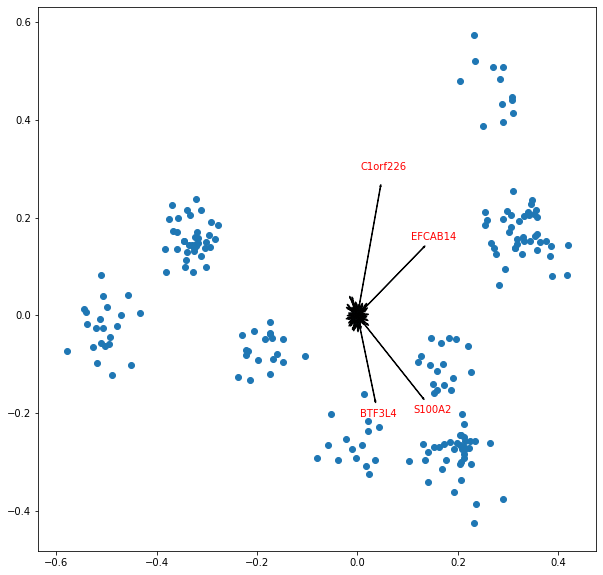

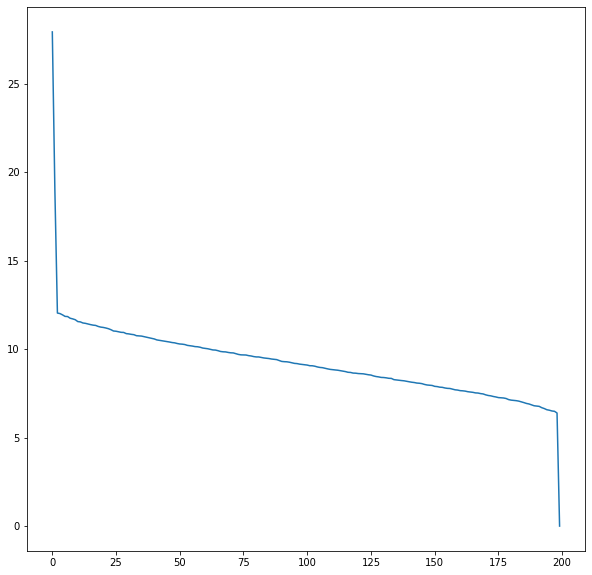

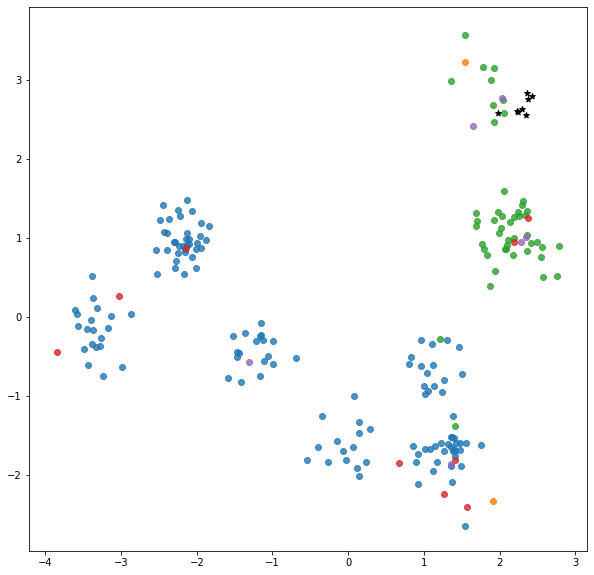

In [231]:
labels_list = list(data.head())
PCA_data, eig_vectors, eig_vals = PCA(log_data_arr, 8) 
PCA_plots(PCA_data, eig_vectors, eig_vals, labels_list)
plot_clusters(PCA_data, cluster_labels, centroids)
#TODO add the negative control data stuff

In [250]:
pca_clustered_data, pca_centroids, pca_cluster_labels, pca_sqr_dist = hard_k_means_cluster(8, 
                                                                      np.asarray(PCA_data[:,0:2]), 10)

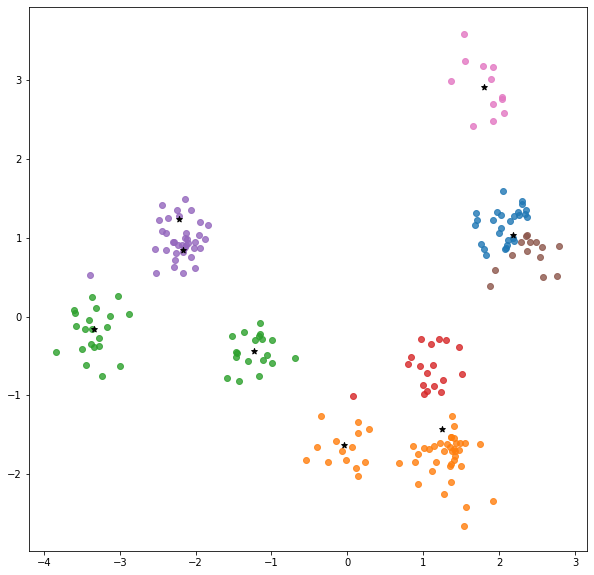

In [251]:
plot_clusters(PCA_data, pca_cluster_labels, pca_centroids)

In [132]:
print

22.360679774997898

In [168]:
X_star = log_data_arr - np.mean(log_data_arr, axis=0)
U,S,V_T = svd(X_star)
U.shape

(200, 200)

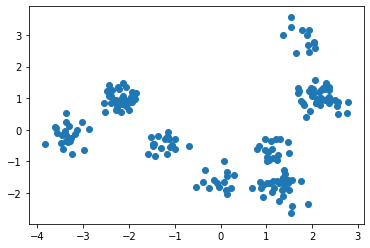

In [90]:
pca = np.matmul(X_star,np.transpose(V_T[0:2,:]))
plt.scatter(pca[:,0], pca[:,1])

__for part three, can fix by either de-noising the data with PCA before clustering or just clustering on the PCA components__